In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
X,y = make_blobs(n_samples=1000, n_features=2, centers=3, random_state=42)

In [3]:
X

array([[-6.59633932, -7.13901457],
       [-6.13753182, -6.58081701],
       [ 5.19820575,  2.04917508],
       ...,
       [ 3.69047995,  4.60555175],
       [ 4.03036663,  1.78619838],
       [-7.44179522, -7.08933147]])

In [4]:
y

array([2, 2, 1, 0, 0, 2, 1, 1, 1, 1, 0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 1, 2,
       2, 2, 1, 0, 0, 0, 1, 1, 2, 2, 1, 0, 0, 2, 2, 1, 2, 2, 0, 1, 0, 2,
       0, 2, 0, 0, 2, 1, 2, 0, 1, 2, 0, 2, 0, 0, 0, 1, 1, 0, 2, 2, 0, 0,
       2, 1, 1, 0, 2, 0, 1, 1, 1, 2, 1, 0, 0, 0, 1, 0, 0, 0, 1, 2, 1, 2,
       0, 0, 0, 0, 1, 1, 2, 1, 2, 0, 1, 1, 1, 2, 2, 0, 2, 1, 1, 0, 1, 0,
       2, 1, 1, 1, 0, 1, 2, 2, 1, 0, 0, 1, 2, 1, 2, 2, 1, 2, 1, 1, 0, 1,
       1, 2, 0, 2, 0, 1, 1, 1, 0, 0, 2, 2, 2, 0, 1, 0, 0, 0, 0, 2, 1, 2,
       0, 1, 0, 1, 0, 2, 1, 0, 0, 1, 0, 0, 1, 1, 2, 2, 1, 0, 0, 1, 0, 2,
       1, 2, 1, 2, 0, 1, 0, 1, 0, 2, 0, 2, 0, 2, 1, 0, 1, 1, 0, 2, 1, 1,
       1, 2, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 2, 2, 1, 1, 0, 2, 0, 2, 1,
       2, 2, 1, 0, 2, 0, 0, 1, 2, 0, 0, 2, 0, 2, 1, 1, 2, 1, 2, 1, 2, 2,
       2, 1, 2, 0, 1, 0, 1, 0, 1, 1, 2, 1, 0, 1, 0, 1, 1, 1, 1, 0, 2, 1,
       2, 2, 1, 0, 0, 2, 1, 0, 1, 1, 0, 2, 0, 2, 2, 1, 2, 1, 2, 1, 1, 0,
       0, 1, 0, 2, 2, 0, 1, 1, 2, 0, 1, 2, 2, 0, 2,

In [5]:
##as we are using clustering, we only need X. we dont need y

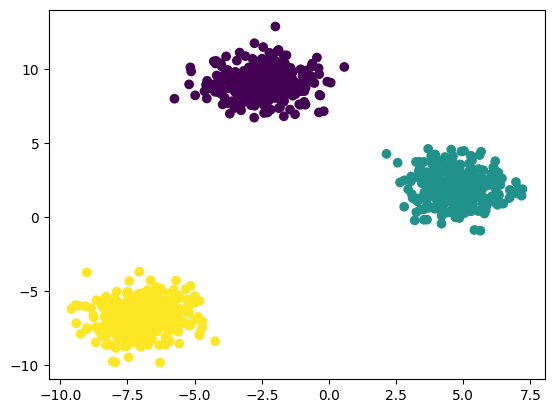

In [7]:
plt.scatter(X[:,0],X[:,1],c=y)

In [8]:
##standardization-- feature scaling techniqe
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [10]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [11]:
from sklearn.cluster import KMeans


In [12]:
##elbow method to select K value
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

In [13]:
wcss##keeps on decreasing as we increase the value of k

[1400.0,
 439.94989480569075,
 45.53331360570867,
 39.52037606986809,
 33.18956139860944,
 27.18423801068885,
 25.00301157328277,
 22.759072413056778,
 21.20145112533051,
 18.384162326822654]

TypeError: '<' not supported between instances of 'int' and 'type'

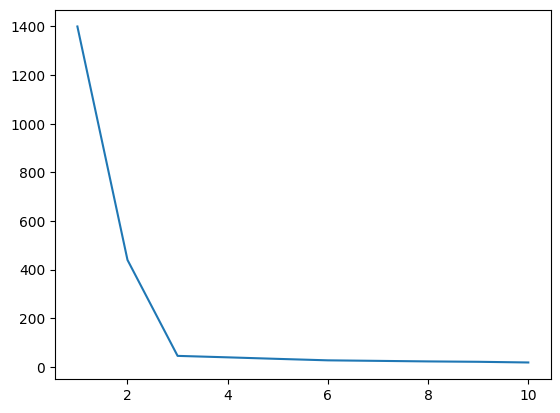

In [14]:
##plot elbow curve
plt.plot(range(1,11),wcss)
plt.xticks((range,1,11))
plt.xlabel("no of clusters")
plt.ylabel("wcss")
plt.show()

In [15]:
kmeans= KMeans(n_clusters=3, init="k-means++")

In [16]:
kmeans.fit_predict(X_train_scaled)

array([1, 1, 1, 0, 2, 2, 1, 1, 2, 2, 2, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       2, 2, 0, 0, 2, 0, 1, 1, 2, 1, 2, 0, 1, 2, 2, 0, 2, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 2, 1, 0, 0, 1, 0, 1, 1, 1, 0, 2,
       0, 2, 2, 1, 1, 1, 0, 2, 2, 0, 2, 2, 0, 1, 1, 0, 1, 2, 1, 0, 1, 2,
       0, 2, 1, 2, 2, 2, 2, 0, 1, 1, 1, 2, 2, 1, 1, 2, 0, 0, 2, 1, 0, 2,
       1, 1, 1, 1, 1, 1, 2, 0, 0, 0, 0, 1, 2, 0, 0, 1, 0, 0, 1, 2, 0, 2,
       0, 2, 1, 0, 0, 1, 1, 2, 0, 1, 0, 1, 0, 1, 0, 2, 2, 0, 0, 2, 0, 2,
       2, 0, 2, 0, 2, 1, 2, 2, 0, 2, 2, 1, 0, 0, 0, 1, 1, 2, 1, 0, 1, 2,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 2, 2, 2, 2, 1, 2, 2, 2, 0, 1,
       1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 1, 1, 2, 1, 2, 1,
       2, 0, 1, 1, 0, 0, 1, 0, 2, 2, 0, 2, 0, 2, 0, 1, 1, 1, 0, 2, 0, 0,
       1, 1, 1, 2, 2, 0, 1, 2, 1, 1, 2, 0, 1, 2, 2, 0, 0, 0, 1, 1, 2, 2,
       2, 2, 1, 0, 2, 1, 0, 1, 1, 1, 2, 0, 1, 1, 0, 1, 2, 0, 0, 1, 0, 0,
       2, 2, 1, 1, 0, 1, 0, 1, 2, 0, 2, 2, 0, 2, 0,

In [17]:
y_pred= kmeans.fit_predict(X_test_scaled)

In [18]:
y_pred

array([2, 0, 0, 1, 2, 0, 1, 2, 1, 2, 2, 1, 2, 2, 2, 0, 0, 1, 0, 0, 0, 2,
       2, 1, 1, 1, 0, 2, 1, 2, 0, 1, 1, 0, 1, 1, 1, 0, 2, 1, 2, 0, 0, 1,
       2, 0, 1, 1, 2, 0, 1, 2, 2, 1, 0, 0, 2, 2, 0, 1, 1, 2, 0, 1, 0, 2,
       2, 0, 0, 2, 2, 0, 0, 0, 1, 0, 0, 0, 0, 1, 2, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 2, 0, 0, 0, 1, 2, 0, 1, 2, 2, 0, 2, 0, 0, 2, 2, 0, 1,
       1, 1, 2, 0, 1, 0, 2, 2, 1, 0, 1, 0, 2, 1, 1, 2, 2, 2, 0, 0, 1, 1,
       0, 0, 2, 0, 2, 2, 2, 1, 2, 2, 1, 1, 0, 0, 2, 0, 0, 0, 1, 2, 0, 1,
       2, 2, 0, 0, 1, 1, 1, 2, 0, 1, 2, 0, 0, 2, 0, 0, 1, 2, 0, 1, 1, 1,
       2, 1, 0, 1, 2, 1, 0, 1, 1, 1, 2, 1, 1, 0, 2, 2, 2, 0, 1, 2, 0, 2,
       0, 2, 1, 2, 1, 1, 2, 2, 2, 1, 0, 2, 2, 2, 0, 1, 0, 1, 1, 2, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 2, 2, 2, 2, 1, 1, 0, 2, 0, 0, 1, 1, 0, 2, 1,
       0, 0, 0, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 0, 0, 1, 2, 1,
       2, 0, 1, 0, 0, 1, 2, 1, 0, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 2, 2, 1, 1, 1, 0, 1, 1, 1], d

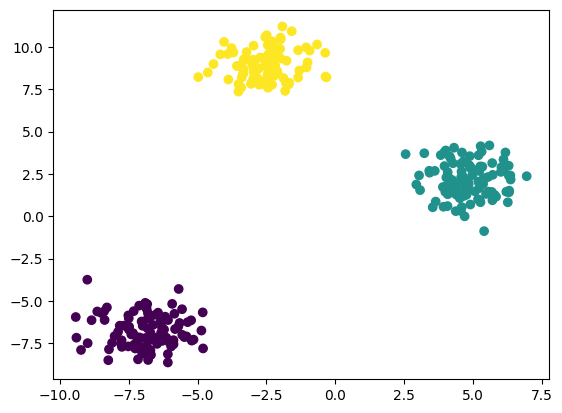

In [21]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred)

In [22]:
##validating the k value
##knee locator
##silhoutee scoring

In [24]:
##kneelocator
!pip install kneed


[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [25]:
from kneed import KneeLocator
kl=KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing") #this is used for elbow method

In [26]:
kl.elbow

np.int64(3)

In [27]:
##silhoutee scoring is used for validating the clusters

from sklearn.metrics import silhouette_score

In [30]:
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X_train_scaled)
    score=silhouette_score(X_train_scaled,kmeans.labels_)
    silhouette_coefficients.append(score)

In [31]:
silhouette_coefficients

[np.float64(0.4984687830016051),
 np.float64(0.8421639000152683),
 np.float64(0.6782118723139062),
 np.float64(0.5082330327957173),
 np.float64(0.3534810432188397),
 np.float64(0.34291725456960265),
 np.float64(0.3428028903231553),
 np.float64(0.3352538663765302),
 np.float64(0.32420981618134564)]

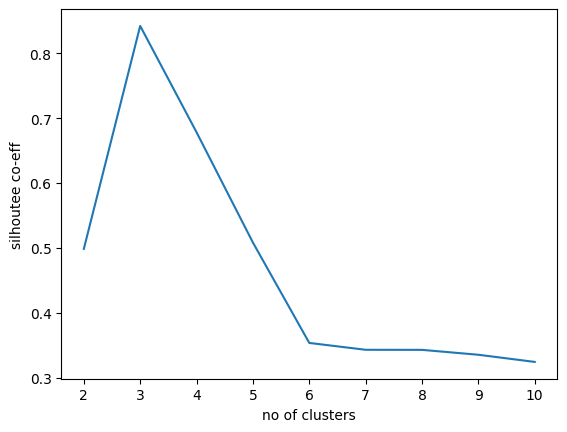

In [33]:
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("no of clusters")
plt.ylabel("silhoutee co-eff")
plt.show()

In [ ]:
##whereever k is high we can say that the clusters are well separated.